In [0]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from tensorflow.keras.layers import LeakyReLU

if not os.path.isdir('models'):
    os.mkdir('models')

In [44]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


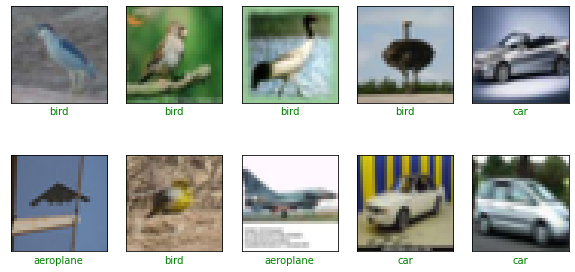

In [45]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x,y,p):
    indices = np.random.choice(range(x.shape[0]), 10, replace = False)
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col='green' if np.argmax(y[i])== np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()
show_random_examples(x_train, y_train, y_train)


In [46]:
def create_model():
  def add_conv_block(model, num_filters):
    model.add(Conv2D(num_filters, 3, padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters, 3))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model
  model = tf.keras.models.Sequential()
  model.add(Input(shape=(32, 32, 3)))
  model = add_conv_block(model, 32)
  model = add_conv_block(model, 64)
  model = add_conv_block(model, 128)
  model.add(Flatten())
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
  return model
model=create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 32)       

Epoch 1/10
938/938 [==============================] - 94s 100ms/step - loss: 0.7448 - accuracy: 0.7231 - val_loss: 0.5125 - val_accuracy: 0.8150
Epoch 2/10
938/938 [==============================] - 93s 99ms/step - loss: 0.5014 - accuracy: 0.8001 - val_loss: 0.4055 - val_accuracy: 0.8540
Epoch 3/10
938/938 [==============================] - 97s 103ms/step - loss: 0.4438 - accuracy: 0.8226 - val_loss: 0.3933 - val_accuracy: 0.8650
Epoch 4/10
938/938 [==============================] - 94s 100ms/step - loss: 0.4047 - accuracy: 0.8401 - val_loss: 0.3626 - val_accuracy: 0.8563
Epoch 5/10
938/938 [==============================] - 94s 100ms/step - loss: 0.3716 - accuracy: 0.8566 - val_loss: 0.2862 - val_accuracy: 0.8940
Epoch 6/10
938/938 [==============================] - 94s 100ms/step - loss: 0.3542 - accuracy: 0.8642 - val_loss: 0.3460 - val_accuracy: 0.8717
Epoch 7/10
938/938 [==============================] - 94s 100ms/step - loss: 0.3362 - accuracy: 0.8708 - val_loss: 0.3347 - val_acc

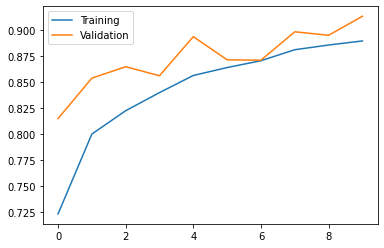

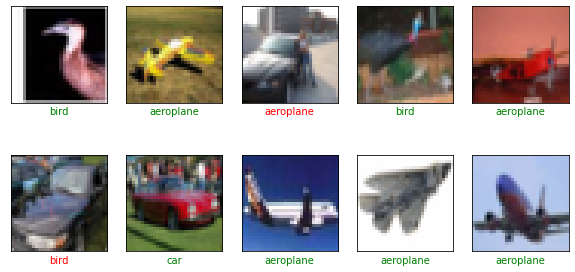

In [47]:
h=model.fit(x_train/255., y_train, validation_data=(x_test/255., y_test), 
            epochs=10, batch_size=16,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                        patience=3),
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                       save_best_only=True, save_weights_only=False, 
                       monitor='val_accuracy')])

accs = h.history['accuracy']
val_accs = h.history['val_accuracy']
plt.plot(range(len(accs)), accs, label='Training')
plt.plot(range(len(accs)), val_accs, label='Validation')
plt.legend()
plt.show()
preds=model.predict(x_test/255.)
show_random_examples(x_test, y_test, preds)

This code can be used to run the model multiple times and returns predicted labels of 10 random test images


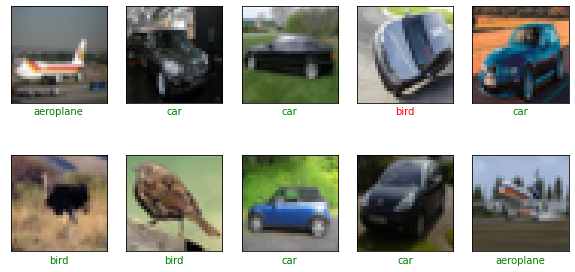

In [51]:
preds=model.predict(x_test/255.)
show_random_examples(x_test, y_test, preds)